### **Course**: BIO-341 [_Dynamical systems in biology_](https://moodle.epfl.ch/course/info.php?id=14291)

**Professor**: _Julian Shillcock_ & _Felix Naef_

SSV, BA5, 2023

Note that this document is primarily aimed at being consulted as a Jupyter notebook, the PDF rendering being not optimal.

In [22]:
# import important libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint
from IPython.display import set_matplotlib_formats
from matplotlib.markers import MarkerStyle

set_matplotlib_formats("png", "pdf")

/var/folders/8w/hhwzbx0d6zg_2q5hrl31_yn00000gq/T/ipykernel_35128/3620943358.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("png", "pdf")


# Insect outbreak and bifurcations

The goal of this exercise is to study a model of insect outbreak in which the solutions change qualitatively when the environment parameters are modified. 

## Bifurcations (Paper and pencil)

Consider the 1st-order systems

1. $\dot{x} = (x-2)(x-r)$

2. $\dot{x} = x^2 + b$

**A. Discuss the fixed points and their stability in function of the parameters $r$ or $b$.**

>1. $x^* = 2$ and $x^* = r$ are the fixed points.  
  For $r>2$, $x^*=r$ is unstable, $x^* = 2$ is stable.  
  For $r=2$ there is only one semi-stable fixed point in $x^* = 2$.  
  For $r<2$, $x^*=r$ is stable, $x^* = 2$ is unstable.  

>2. $\dot{x} = x^2 + b$ thus $x^* = \pm\sqrt{-b}$ are the fixed points for $b<0$.  
We get $x^* = -\sqrt{-b}$ stable and $x^* = \sqrt{-b}$ unstable.  
If $b =0$,  the fixed point $x^* =0$ is semi-stable.

**B. Linearize the equation for the dynamical system to obtain explicit solution near the fixed points. Linearization refers to finding the linear approximation to a function at a given point:**  $\dot{\eta} = \eta \cdot F'(x^*)$ with $\eta(t) = x(t) - x^*$ and the solution $\eta = \eta_0e^{tF'(x^*)}$ 

>To study the solution near the fixed points we use the linearization: $\dot{\eta} = \eta \cdot F'(x^*)$ with $\eta(t) = x(t) - x^*$ (cf. chapter 1 for derivation). So it is only necessary to compute the derivatives at the fixed points $F'(x^*)$.

>1. As $F'(x^*) = 2x-r-2$, we have  $F'(2) = 2-r$ and $F'(r) = -(2-r)$. As the solution of the linearization is $\eta = \eta_0e^{tF'(x^*)}$, we get $\eta(t) = \eta_0e^{\pm t(2-r)}$  
  ⠀⠀

>2. As  $F'(x) = 2x$, we have  $F'(\pm\sqrt{-b})=\pm2\sqrt{-b}$. As the solution of the linearization is  $\eta = \eta_0e^{tF'(x^*)}$, we get $\eta(t) = \eta_0e^{\pm t 2\sqrt{-b}}$.


**C. Bifurcation diagrams: Plot the position of the fixed points in function of $r$ or $b$, using a solid line for the stable branch and a dashed line for unstable branch.**


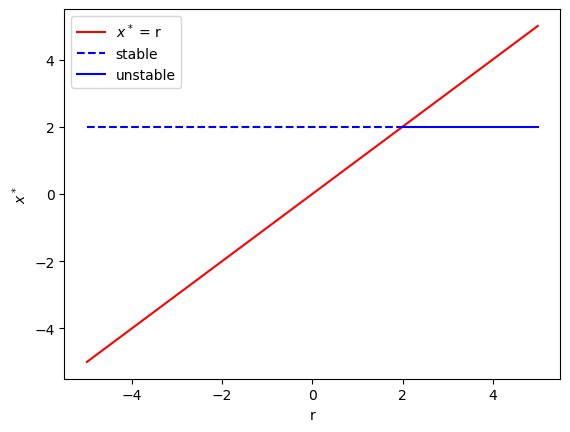

In [23]:
# plot for system 1
stable_r = np.linspace(-5, 2, 100)
unstable_r = np.linspace(2, 5, 100)
line = np.linspace(-5, 5, 100)

plt.plot(line, line, color="r" , label = '$x^*$ = r')
plt.plot([-5, 2], [2, 2], color="b", ls="--", label="stable")
plt.plot([2, 5], [2, 2], color="b", ls="-", label="unstable")

plt.xlabel("r")
plt.ylabel(r"$x^*$")
plt.legend()
plt.show()

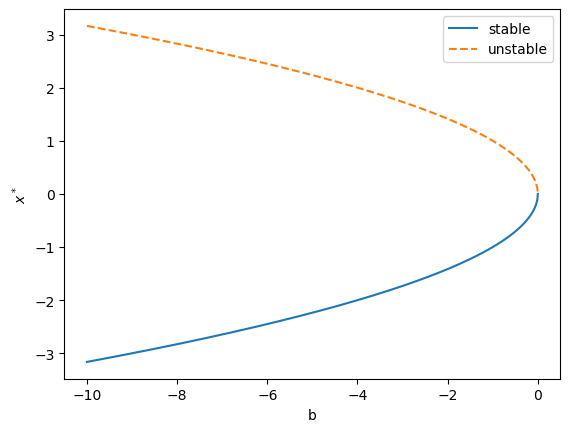

In [24]:
# plot for system 2
domain_b = np.linspace(-10, 0, 1000)
stable = -np.sqrt(-domain_b)
unstable = np.sqrt(-domain_b)
plt.plot(domain_b, stable,  ls="-", label="stable")
plt.plot(domain_b, unstable,  ls="--", label="unstable")

plt.xlabel("b")
plt.ylabel(r"$x^*$")
plt.legend()
plt.show()

## Insect outbreak (epidemy) (paper and pencil & code)

![](Choristoneura_fumiferana_larva_small.jpg "Title")

The spruce budworm (Choristoneura fumiferana), commonly known as T.B.E., is without doubt the insect pest best known to foresters and the general public. Having been very present in Quebec forests during the 60's and 70's, the T.B.E. did not win the sympathy of the population. In fact, the damage caused by E.B.T. during the last epidemic amounted to more than 235 million cubic metres of wood, the equivalent of ten years' harvest for the forestry industry. Needless to say, the spruce budworm has considerably altered the forest landscape in many parts of Quebec.  
  


During an epidemy, the spruce budworm can defoliate and kill entire forests within few years. In a simple model for the insect population $N$, the available foliage allows for a relative growth rate $r_B$ and the environment has a maximal capacity $K$ as in the logistic growth model. At the same time, insects are eaten by birds at a certain rate, which leads to the population model:

$$
\dot N = \dfrac{dN}{dt}= r_B N (1-\frac{N}{K}) - p(N)
$$
    
The death rate $p(N)$ is assumed to take the form:

$$
p(N) = B\frac{N^2}{A^2 + N^2} \; \text{with} \: A,B >0
$$
    
This term is small when the budworms population is small and the birds seek for food elsewhere, and then saturates for larger $N$ when all birds eat as much worms as they can.

**A. Plot the function $p(N)$ and discuss the meaning of the parameters $A$ and $B$.**

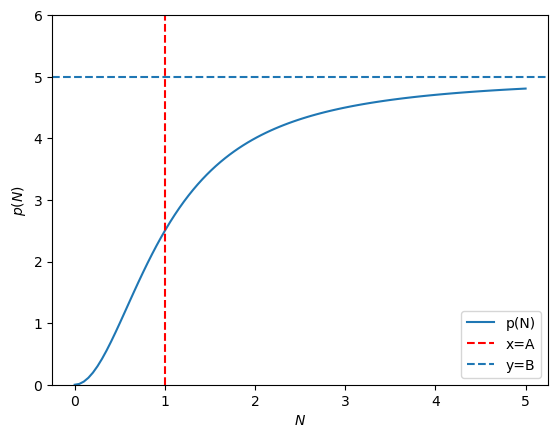

In [25]:
# Here is an example of plot where A=1 and B=5.
def p(N, A, B):
    return B * N**2 / (A**2 + N**2)


A = 1
B = 5
N_domain = np.linspace(0, 5, 100)
plt.plot(N_domain, p(N_domain, A, B), label="p(N)")
plt.axvline(x=A, ls="--", c='r',label="x=A")
plt.axhline(y=B, ls="--", label="y=B")
plt.ylim([0, 6])
plt.ylabel(r"$p(N)$")
plt.xlabel(r"$N$")
plt.legend()
plt.show()

>$A$ is the value of $N$ when $p(N)$ is at half maximum. $B$ is the saturation value of $p(N)$ for large $N$.

**B. Discuss the fixed points and stability properties of this model in function of $r$ and $k$ by the following steps:** 
		
1) For convenience, let's first change variables: $x = \dfrac{N}{A}, \; r=r_B \;\dfrac{A}{B}, \; k=\dfrac{K}{A}, \; \tau = \dfrac{Bt}{A}$.  
Verify that this leads to the dimensionless form with two dimensionless parameters $r,k$. 
$$
\dfrac{dx}{d\tau} = r x (1-\frac{x}{k}) - \frac{x^2}{1+x^2} = x(f(x) - h(x))
$$				

>We have $dx = \dfrac{dN}{A}$ and $d\tau = \dfrac{Bdt}{A}$ so $\dfrac{dN}{dt} = \dfrac{Adx}{dt}=\dfrac{Bdx}{d\tau}$. If we substitute all the other variables, we get: $B\dfrac{dx}{d\tau}=Brx(1-\dfrac{x}{k})-B\dfrac{x^{2}}{1+x^{2}}$ which we simplify by B to get the dimensionless form. 

2) Consider the following three qualitatively different situations and plot in each case the two terms $f(x)= r(1-\dfrac{x}{k})$ and $h(x)= \dfrac{x}{1+x^2}$ in function of x. Note that the intersections correspond to the fixed points (cf. the genetic switch in Chapter 2).			
  * intermediate $r$, intermediate $k$ (one fixed point, called the refuge)
  * small $r$  , large $k$  (3 fixed points, called the bistable region)
  * large $r$  , large $k$  (one fixed points, called the outbreak).
  
Hint: Here, small will be less than 1, intermediate will be around 1, and large will be more than 2. 

>To calculate the fixed points, we use the condition $r(1-\dfrac{x}{k}) =\dfrac{x}{1+x^{2}}$ (Note that only the left side is dependent on $r$ and $k$). 
We observe 1 to 3 fixed points $x^{*}$ at the intersections of the terms $r(1-\dfrac{x}{k})$ and $\dfrac{x}{1+x^{2}}$ depending on $r$ and $k$.  ⠀⠀

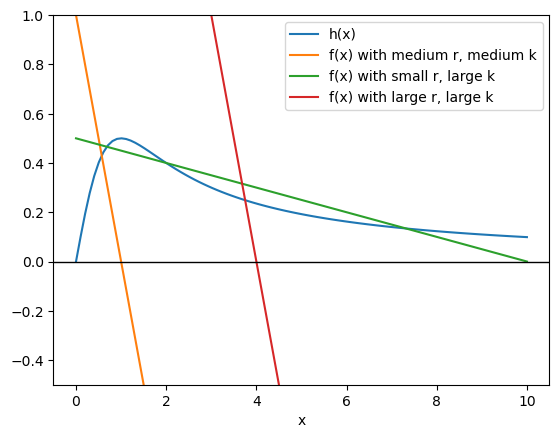

In [26]:
x = np.linspace(0.0, 10, 100)


def f(r, k, x):
    return r * (1 - x / k)


def h(x):
    return x / (1 + x**2)


plt.plot(x, h(x), label="h(x)")

# medium r, medium k
r = 1.0
k = 1.0
plt.plot(x, f(r, k, x), label="f(x) with medium r, medium k")

# small r, large k
r = 0.5
k = 10.0
plt.plot(x, f(r, k, x), label="f(x) with small r, large k")

# large r, large k
r = 4.0
k = 4.0
plt.plot(x, f(r, k, x), label="f(x) with large r, large k")

plt.axhline(y=0, color="black", lw=1)
plt.legend()
plt.xlabel("x")
plt.ylim([-0.5, 1])
plt.show()

3) For each situation sketched previously (small, intermediate and large $r$), plot $\dfrac{dx}{d\tau}$ in function of $x$ and characterize the stability of the fixed points.

>In addition to 1-3 fixed points found in b., we have $x^*=0$ which is an unstable fixed point.

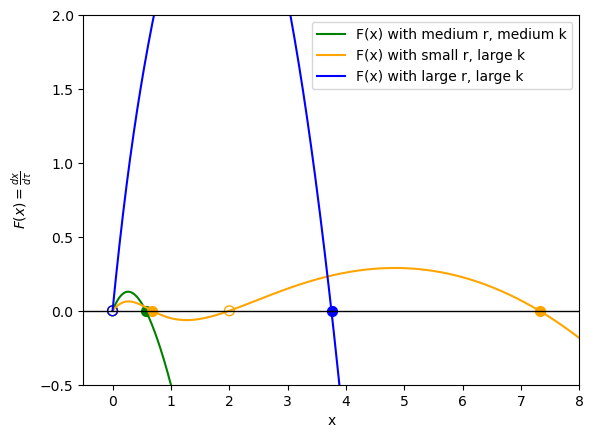

In [27]:
x = np.linspace(0.0, 10, 1000)


def F(r, k, x):
    return x * (f(r, k, x) - h(x))


# medium r, medium k
r = 1.0
k = 1.0
plt.plot(x, F(r, k, x), label="F(x) with medium r, medium k", color="green")
# look for intersection and stability (dirty way)
zeros = [y if abs(F(r, k, y)) < 10**-3 else np.nan for y in x]
stability = [
    "-" if F(r, k, y2) - F(r, k, y1) > 0 else "+" for y1, y2 in zip(x[:-1], x[1:])
]
for zero, stab in zip(zeros, stability):
    if stab == "+":
        plt.scatter(x=zero, y=0, marker="o", s=50, color="green")
    else:
        plt.scatter(x=zero, y=0, marker="o", s=50, color="green", facecolor="none")


# small r, large k
r = 0.5
k = 10.0
plt.plot(x, F(r, k, x), label="F(x) with small r, large k", color="orange")
# look for intersection and stability (dirty way)
zeros = [y if abs(F(r, k, y)) < 10**-3 else np.nan for y in x]
stability = [
    "-" if F(r, k, y2) - F(r, k, y1) > 0 else "+" for y1, y2 in zip(x[:-1], x[1:])
]
for zero, stab in zip(zeros, stability):
    if stab == "+":
        plt.scatter(x=zero, y=0, marker="o", s=50, color="orange")
    else:
        plt.scatter(x=zero, y=0, marker="o", s=50, color="orange", facecolor="none")

# large r, large k
r = 4.0
k = 4.0
plt.plot(x, F(r, k, x), label="F(x) with large r, large k", color="blue")
# look for intersection and stability (dirty way)
zeros = [y if abs(F(r, k, y)) < 10**-2 else np.nan for y in x]
stability = [
    "-" if F(r, k, y2) - F(r, k, y1) > 0 else "+" for y1, y2 in zip(x[:-1], x[1:])
]
for zero, stab in zip(zeros, stability):
    if stab == "+":
        plt.scatter(x=zero, y=0, marker="o", s=50, color="blue")
    else:
        plt.scatter(x=zero, y=0, marker="o", s=50, color="blue", facecolor="none")


plt.axhline(y=0, color="black", lw=1)
plt.legend()
plt.xlabel("x")
plt.ylabel(r"$F(x) = \frac{dx}{d\tau}$")
plt.ylim([-0.5, 2])
plt.xlim([-0.5, 8])
plt.show()

**C. Bifurcation diagram: Find the boundaries in the ($r,k$)-plane between the single and triple fixed points regions. Proceed stepwise:** 

1) Express mathematically the requirement that the two curves $f(x)=r(1-\dfrac{x}{k})$ and $h(x)= \dfrac{x}{1+x^2}$ are _tangent_. Use this requirement to express $r,k$ at the tangents in function of $x$. (Control: $r(x) = \dfrac{2x^3}{(1+x^2)^2}$ and $k(x) = \dfrac{-2x^3}{(1-x^2)}$ ).  
Hint: To be tangent, the values of the curves and the derivatives must be equal at the *touching* points $x$.
			
			


>For the functions $f(x)$ and $h(x)$ to be tangent, and therefore ensuring the semistability condition, they have to fulfill the following two conditions:
1. $f(x)=h(x)$
2. $f^{'}(x)= h^{'}(x)$  

>We start solving the derivatives, which gives $r=-\dfrac{k(1-x^2)}{(1+x^2)^2}$  
By insertion into $r(1-\dfrac{x}{k})=\dfrac{x}{1+x^2}$, we can express $r$ and $k$ in parametric form where the parameter is $x$. 
\begin{equation}
    r(x) , k(x)
\end{equation}
Note that $x\geq0$ is required for positive $r$ and $k$.

2) Plot the bifurcation diagram with Python, that means plot $(r(x^*),k(x^*))$ pairs of the tangent in the $(r,k)$ plane for $x^* \in [1,\infty]$. Use axis-limits $r \in [0,1]$ and $k \in [0,10]$.  
			
**Notice**: since the capacity parameter $k$ is positive, $x$ is restricted to $x^* \in [1,\infty]$. That means that there are no tangential contacts between the two curves for the other values of $x^{*}$.

>We can distinguish the three different sections by recalling exercise B.2. It may be confusing that there is no clear difference between outbreak and refuge for small k. But keep in mind that at a small capacity the line between both is actually irrelevant.

/var/folders/8w/hhwzbx0d6zg_2q5hrl31_yn00000gq/T/ipykernel_35128/2511889505.py:4: RuntimeWarning: divide by zero encountered in divide
  k = -2 * x**3 / (1 - x**2)


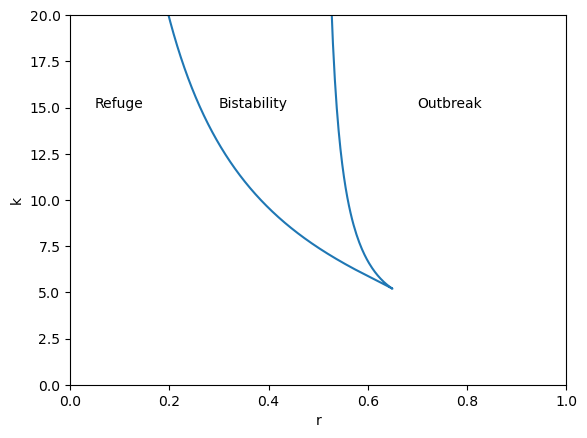

In [28]:
# x = np.linspace(1.01,10,1000)
x = np.linspace(1, 10, 1000)
r = 2 * x**3 / (1 + x**2) ** 2
k = -2 * x**3 / (1 - x**2)
plt.plot(r, k)
plt.xlim([0, 1])
plt.ylim([0, 20])
plt.xlabel("r")
plt.ylabel("k")
plt.text(x=0.05, y=15, s="Refuge")
plt.text(x=0.3, y=15, s="Bistability")
plt.text(x=0.7, y=15, s="Outbreak")
plt.show()

3) **A biological catastrophe**: Bistability and hysteresis. Sketch what happens to a budworm population that lives in an environment where the growth rate $r$ is low, then slowly increases to high values, and finally decreases again to its low value (consider and compare the two cases $k=7$ and $k=3$). Assume that the budworm population equilibrates very fast when the environment changes (it is always at a fixed point) and that it is initially in its low (refuge) state. Use the representation of $f(x)$ and $h(x)$ similar as in B.2 to plot the results and to explain the behavior through time of the population of budworms.  
__Hint__: Vary $r$  while keeping $k$  constant in your results of B.2
			
	




	



>The plots below show $r(1-\dfrac{x}{k})$ and $\dfrac{x}{1+x^2}$ vs. $x$. The intersection(s) is (are) $x^{*}$. When $k = 7$, at the beginning for a low value of $r$, the population is at the stable fixed point (refuge). As $r$ increases (the slope of $f(x)$ increases), the two curves become tangential and there are two fixed points (saddle node). Then, we enter the bistable region, where there are three fixed points: a stable one at a low value, an unstable one at an intermediate value and a stable one at a high value. The population is still at the left-most stable fixed point. As $r$ keeps increasing, the two curves are again tangential. Then, only one fixed point remains. The population grows and reaches that fixed point (outbreak). Next, $r$ is decreasing. The population remains at the right-most stable fixed point when entering the bistable region again (crossing the value of $r$ for which the two curves are tangent again). As $r$ keeps decreasing, we leave the bistable region and the population goes back to the only remaining fixed point, at a low value. 
		
>Note how the $r(1-\dfrac{x}{k}$) curve rotates around the $x=k$ point. When $k = 3$, there is only one fixed point, and we cannot reach the bistable region.

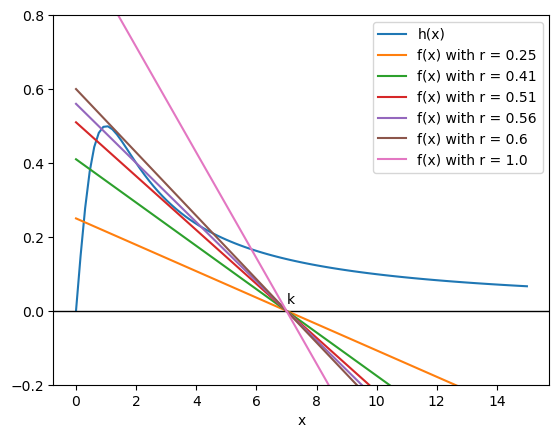

In [29]:
x = np.linspace(0.0, 15, 100)

k = 7.0
plt.plot(x, h(x), label="h(x)")
plt.axhline(y=0, color="black", lw=1)
plt.text(7, 0.02, "k")
for r in [0.25, 0.41, 0.51, 0.56, 0.6, 1.0]:
    plt.plot(x, f(r, k, x), label="f(x) with r = " + str(r))
plt.legend()
plt.xlabel("x")
plt.ylim([-0.2, 0.8])
plt.show()

In [30]:
# play with this, maybe not crazy big values
k = 7.

#plot 2
xx = np.linspace(0.0, 6.0, 100)

#plot 3 , bifurcation diagram
xxx = np.linspace(1, 10, 1000)
r_ = 2 * xxx**3 / (1 + xxx**2) ** 2
k_ = -2 * xxx**3 / (1 - xxx**2)

def f_anim(r):
    # prapre double plot
    plt.figure(figsize=(15, 5))
    plt.suptitle("r=" + str(r))
    plt.subplot(131)
    plt.plot(x, h(x), label="h(x)")
    plt.plot(x, f(r, k, x), label="f(x)")
    plt.axhline(y=0, color="black", lw=1)
    plt.text(k, 0.02, "k")
    plt.xlabel("x")
    plt.title("r=" + str(r))
    plt.ylim([-0.2, 0.8])
    plt.legend()

    plt.subplot(132)
    plt.plot(xx, F(r, k, xx), label="F(x) = x( f(x)-h(x) )")
    plt.axhline(y=0, color="black", lw=1)
    plt.xlabel("x")
    plt.ylabel("F(x)")
    plt.title("r=" + str(r))
    plt.legend()

    plt.subplot(133)
    plt.plot(r_, k_)
    plt.xlim([0, 1])
    plt.ylim([0, 20])
    plt.xlabel("r")
    plt.ylabel("k")
    plt.text(x=0.05, y=15, s="Refuge")
    plt.text(x=0.3, y=15, s="Bistability")
    plt.text(x=0.7, y=15, s="Outbreak")
    plt.scatter(r , k , color="red", s=30, label="chosen point in parameter space")
    plt.axhline(y= k, color="black", lw=1)
    plt.legend()


interact(f_anim, r=(0.25, 1.0, 0.01))

/var/folders/8w/hhwzbx0d6zg_2q5hrl31_yn00000gq/T/ipykernel_35128/3093461399.py:10: RuntimeWarning: divide by zero encountered in divide
  k_ = -2 * xxx**3 / (1 - xxx**2)


interactive(children=(FloatSlider(value=0.62, description='r', max=1.0, min=0.25, step=0.01), Output()), _dom_…

<function __main__.f_anim(r)>